In [1]:
# 로지스틱 회귀분석 예제 : # 성별(Sex), 나이(Age), 객실등급(Pclass), 요금(Fare)이 생존에 어느 정도의 영향을 미쳤는가
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)


In [2]:
# 데이터 파일 로딩 (전처리한 데이터셋)
df = pd.read_csv("c:/data/titanic/train3.csv")
df.head()


,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
0,0,0,0,1,1,0,22.0,1,0,7.2500
1,1,1,0,0,0,1,38.0,1,0,71.2833
2,1,0,0,1,0,1,26.0,0,0,7.9250
3,1,1,0,0,0,1,35.0,1,0,53.1000
4,0,0,0,1,1,0,35.0,0,0,8.0500


In [3]:
df.columns


Index(['Survived', 'Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age',
       'SibSp', 'Parch', 'Fare'],
      dtype='object')

In [4]:
df.shape


(891, 10)

In [5]:
df.describe()

,Survived,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.242424,0.206510,0.551066,0.647587,0.352413,29.758889,0.523008,0.381594,32.204208
std,0.486592,0.428790,0.405028,0.497665,0.477990,0.477990,13.002570,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,30.000000,0.000000,0.000000,14.454200
75%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
#생존여부를 기준으로 한 평균값들
df.groupby("Survived").mean()

,Pclass1,Pclass2,Pclass3,male,female,Age,SibSp,Parch,Fare
Survived,,,,,,,,,
0,0.145719,0.176685,0.677596,0.852459,0.147541,30.483607,0.553734,0.329690,22.117887
1,0.397661,0.254386,0.347953,0.318713,0.681287,28.595526,0.473684,0.464912,48.395408


Text(0, 0.5, '빈도')

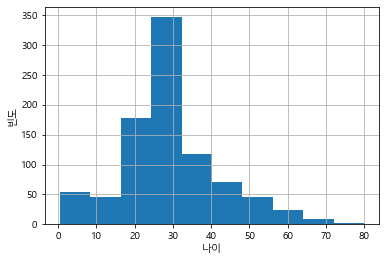

In [7]:
%matplotlib inline
df["Age"].hist()
plt.xlabel('나이')
plt.ylabel('빈도')

Text(0, 0.5, '빈도')

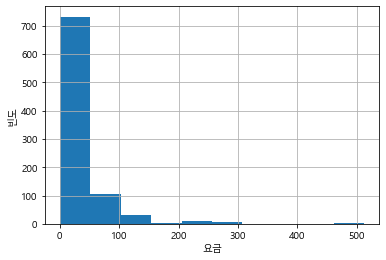

In [8]:
%matplotlib inline
df["Fare"].hist()
plt.xlabel('요금')
plt.ylabel('빈도') 

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (0:사망, 1:생존 )')

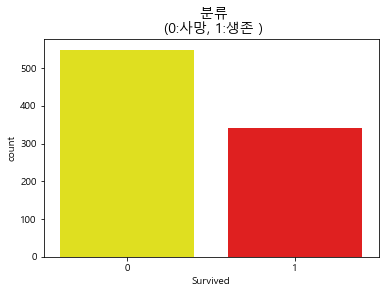

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "red"]
sns.countplot('Survived', data=df, palette=colors)
plt.title(' 분류\n (0:사망, 1:생존 )', fontsize=14)
#불균형 데이터셋

In [10]:
train_cols = df.columns[1:]
X = df[train_cols] # 독립변수
y = df["Survived"] # 종속변수
print(type(X), type(y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [11]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

In [12]:
train_cols = df.columns[1:]
X = X_samp[train_cols] # 독립변수
y = y_samp["Survived"]


In [13]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
result.summary2()
# 모델의 설명력 32.2% 
# Parch, Fare는 유의하지 않음
# 해석: coef(회귀계수)를 기준으로 볼 때의 생존 확률
# 좌석등급: 1등석 > 2등석 > 3등석 순으로 생존률이 높았다
# 성별; 여성은 생존 확률이 높았다
# 성별 > 1등석 > 2등석 > 3등석순으로 생존 여부에 영향을 미쳤음

Optimization terminated successfully.
         Current function value: 0.466486
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              654.1528  
Date:               2022-05-26 11:01 BIC:              690.3765  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           7                LL-Null:          -474.11   
Df Residuals:       676              LLR p-value:      4.2671e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.7178        nan       nan      nan       nan       nan
Pclass2    0.6262        nan       nan      nan       nan       nan
Pclass3   -0.3330        nan       nan      nan       nan       nan
male      -0.3334        nan       nan      nan       nan       nan
female     2.3445        nan       nan      nan       nan       nan
Age       -0.0355     0.0088   -4.0333   0.0001   -0.0527   -0.0182
SibSp     -0.3053     0.1234   -2.4750   0.0133   -0.5471   -0.0635
Parch      0.0078     0.1496    0.0519   0.9586   -0.2854    0.3009
Fare       0.0024     0.0028    0.8660   0.3865   -0.0030    0.0078
=================================================================

"""

In [14]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [15]:
print(" 학습용:",model.score(X_train, y_train))
print(" 검증용:",model.score(X_test, y_test))

 학습용: 0.7879341864716636
 검증용: 0.7737226277372263


In [16]:
from sklearn.metrics import classification_report
pred=model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        73
           1       0.75      0.77      0.76        64

    accuracy                           0.77       137
   macro avg       0.77      0.77      0.77       137
weighted avg       0.77      0.77      0.77       137



In [17]:
import numpy as np
a=np.array([0, 0, 1, 1, 0, 19, 1, 0, 50]).reshape(-1, 9)
a.shape

(1, 9)

In [18]:
import numpy as np
#새로운 값 예측
# 1등석, 2등석, 3등석, 남성, 여성, 나이, 요금, 형제자매, 부모자녀
# 3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
person1=[[0, 0, 1, 1, 0, 19, 1, 0, 50]]
# 1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2=[[1, 0, 0, 0, 1, 17, 0 , 2, 30 ]]
#2등석, 여성, 40세 , 형제자매2, 부모자녀0, 요금20
person3=[[0, 1, 0, 0, 1, 40, 2, 0, 70]]
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

[0]
[1]
[1]


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [19]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=train_cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Survived'])
df2=pd.concat([X_samp,y_samp],axis=1)

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (0: 사망, 1: 생존)')

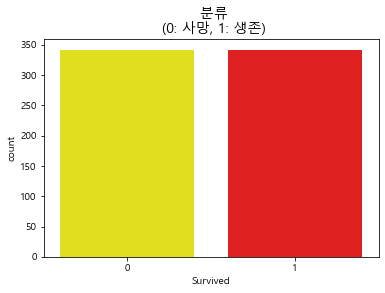

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["yellow", "red"]
sns.countplot('Survived', data=df2, palette=colors)
plt.title(' 분류\n (0: 사망, 1: 생존)', fontsize=14) 

In [21]:
train_cols = df.columns[1:]
X = X_samp[train_cols] # 독립변수
y = y_samp["Survived"] # 종속변수

In [22]:
import statsmodels.api as sm
model=sm.Logit(y,X)
result=model.fit()
result.summary2()
# 모델의 설명력 32.2% 
# Parch, Fare는 유의하지 않음
# 해석: coef(회귀계수)를 기준으로 볼 때의 생존 확률
# 좌석등급: 1등석 > 2등석 > 3등석 순으로 생존률이 높았다
# 성별; 여성은 생존 확률이 높았다
# 성별 > 1등석 > 2등석 > 3등석순으로 생존 여부에 영향을 미쳤음

Optimization terminated successfully.
         Current function value: 0.466486
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.327     
Dependent Variable: Survived         AIC:              654.1528  
Date:               2022-05-26 11:01 BIC:              690.3765  
No. Observations:   684              Log-Likelihood:   -319.08   
Df Model:           7                LL-Null:          -474.11   
Df Residuals:       676              LLR p-value:      4.2671e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-------------------------------------------------------------------
           Coef.    Std.Err.      z      P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass1    1.7178        nan       nan      nan       nan       nan
Pclass2    0.6262        nan       nan      nan       nan       nan
Pclass3   -0.3330        nan       nan      nan       nan       nan
male      -0.3334        nan       nan      nan       nan       nan
female     2.3445        nan       nan      nan       nan       nan
Age       -0.0355     0.0088   -4.0333   0.0001   -0.0527   -0.0182
SibSp     -0.3053     0.1234   -2.4750   0.0133   -0.5471   -0.0635
Parch      0.0078     0.1496    0.0519   0.9586   -0.2854    0.3009
Fare       0.0024     0.0028    0.8660   0.3865   -0.0030    0.0078
=================================================================

"""

In [23]:
#pvalue가  0.05보다 큰 값들을 제거
# train_cols = ['Pclass1', 'Pclass2', 'Pclass3', 'male', 'female', 'Age']
# X = df[train_cols] # 독립변수
# y = df["Survived"]

In [24]:
# import statsmodels.api as sm
# model=sm.Logit(y,X)
# result=model.fit()
# print(result.summary2())
# 모델의 설명력 32.2% 
# Parch, Fare는 유의하지 않음
# 해석: coef(회귀계수)를 기준으로 볼 때의 생존 확률
# 좌석등급: 1등석 > 2등석 > 3등석 순으로 생존률이 높았다
# 성별; 여성은 생존 확률이 높았다
# 성별 > 1등석 > 2등석 > 3등석순으로 생존 여부에 영향을 미쳤음

In [25]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
print(" 학습용:",model.score(X_train, y_train))
print(" 검증용:",model.score(X_test, y_test))

 학습용: 0.7879341864716636
 검증용: 0.7737226277372263


In [27]:
#confusion matrix( 혼동행렬, 오분류표 ) 출력
from sklearn.metrics import confusion_matrix
pred=model.predict(X_test)
cm=confusion_matrix(y_test, pred)
cm


array([[57, 16],
       [15, 49]], dtype=int64)

In [28]:
df_cm=pd.DataFrame(cm, index=['사망', '생존'], columns=['사망', '생존'])
df_cm

,사망,생존
사망,57,16
생존,15,49


c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 49373 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51316 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 49324 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 47581 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\anaconda3\lib\site-pack

<AxesSubplot:title={'center':'Confusion Matrix'}>

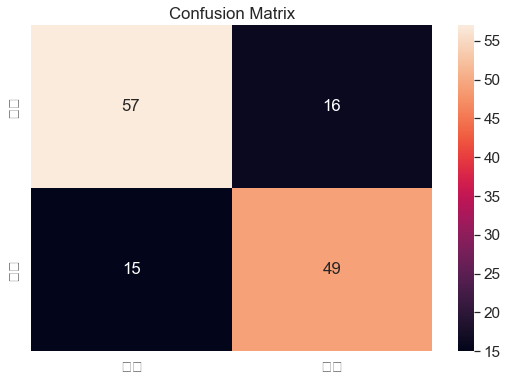

In [29]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title("Confusion Matrix")
sns.heatmap(df_cm, annot=True)
# , 색상이 밝으면 높은 숫자 색상이 어두우면 낮은 숫자

In [30]:
from sklearn.metrics import classification_report
pred=model.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.78      0.79        73
           1       0.75      0.77      0.76        64

    accuracy                           0.77       137
   macro avg       0.77      0.77      0.77       137
weighted avg       0.77      0.77      0.77       137



In [31]:
import numpy as np
#새로운 값 예측
# 1등석, 2등석, 3등석, 남성, 여성, 나이, 요금, 형제자매, 부모자녀
# 3등석, 남성, 19세, 형제자매1, 부모자녀0, 요금50
person1=[[0, 0, 1, 1, 0, 19, 1, 0, 50]]
# 1등석, 여성, 17세, 형제자매0, 부모자녀2, 요금30
person2=[[1, 0, 0, 0, 1, 17, 0 , 2, 30 ]]
#2등석, 여성, 40세 , 형제자매2, 부모자녀0, 요금20
person3=[[0, 1, 0, 0, 1, 40, 2, 0, 70]]
print(model.predict(person1))
print(model.predict(person2))
print(model.predict(person3))

[0]
[1]
[1]


c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [32]:
import joblib
joblib.dump(model, 'c:/data/titanic/titanic_logit.model')

['c:/data/titanic/titanic_logit.model']